# EXPLORATORY DATA ANALYSIS OF ADULT DATA INCOME DATASET

- An individual’s annual income results from various factors. 
- Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# shape of dataset
df.shape

(48842, 15)

- This dataset has 15 columns and 48842 rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
# We can see there are '?' in the data which are missing values.
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
# Replace '?' with nan
df.replace('?',np.nan,inplace=True)

In [11]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
df.isna().sum()*100/len(df)

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

<AxesSubplot:>

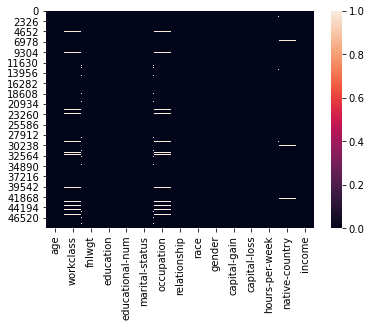

In [13]:
# drop the missing values
sns.heatmap(df.isnull())

In [14]:
#drop the missing values
df.dropna(axis=0, how='any', inplace=True)

In [15]:
df.shape

(45222, 15)

In [16]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [17]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(45175, 15)

In [18]:
df['education'].value_counts()

HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name: education, dtype: int64

In [19]:
df['education'].nunique()

16

In [20]:
df['educational-num'].nunique()

16

In [21]:
df['educational-num'].value_counts()

9     14770
10     9887
13     7559
14     2513
11     1958
7      1619
12     1507
6      1223
4       822
15      785
5       676
8       575
16      544
3       447
2       220
1        70
Name: educational-num, dtype: int64

In [22]:
# As both education and educational-num are giving similar info, let's drop one column.
df.drop('educational-num',axis=1,inplace=True)

In [23]:
# descriptive stats for numerical
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [24]:
# We can see for capital-gain and capital-loss 75% 0f data is 0... drop both the columns.
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [25]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


In [26]:
# income is categorical
df['income'].value_counts()

<=50K    33973
>50K     11202
Name: income, dtype: int64

In [27]:
# Encode <=50K to 0 nad >50K to 1..
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [28]:
df['income'].value_counts()

0    33973
1    11202
Name: income, dtype: int64

# Univariate Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

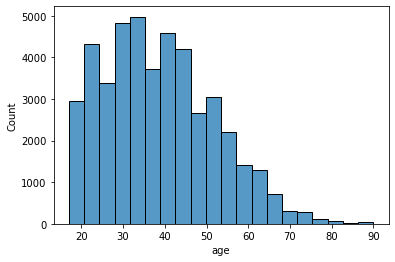

In [29]:
sns.histplot(df['age'],bins=20)

In [30]:
df['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age'>

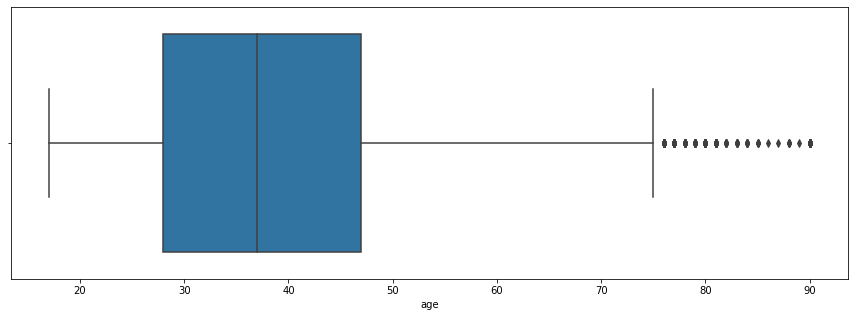

In [31]:
plt.subplots(figsize=(15,5))
sns.boxplot(df['age'])

- 25% people are between age 17 and 28.
- 50% are below age 37 and 75% below age of 47.
- Most of them are between 17 and 50.
- There are outliers in age column for ages above 75.

In [32]:
df.workclass.value_counts()

Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

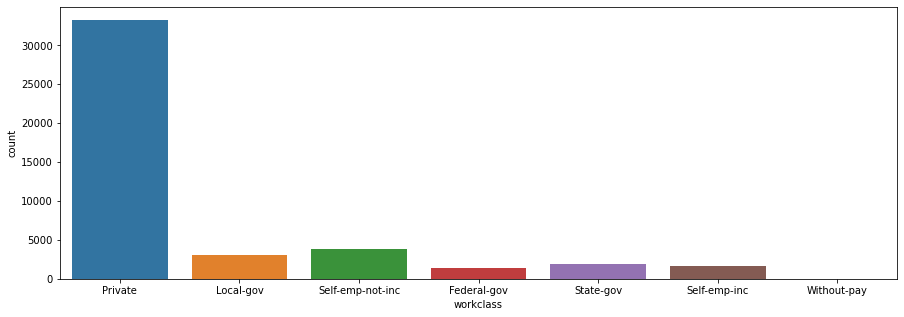

In [33]:
plt.subplots(figsize=(15,5))
sns.countplot(df['workclass'])

- Out of 45175, around 33K i.e, 73% are working in private companies.

<AxesSubplot:xlabel='education', ylabel='count'>

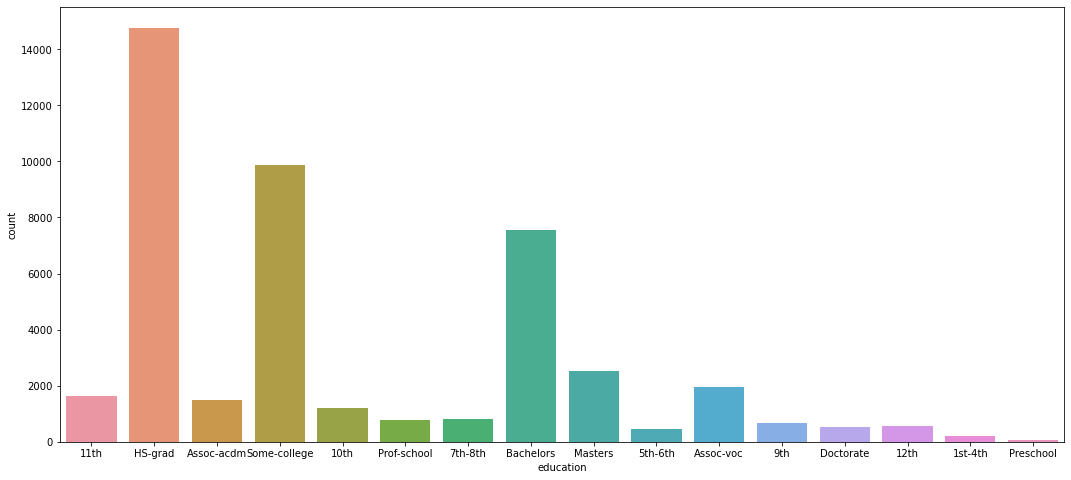

In [34]:
# education
plt.subplots(figsize=(18,8))
sns.countplot(df['education'])

In [35]:
df['occupation'].value_counts()

Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: occupation, dtype: int64

<AxesSubplot:xlabel='occupation', ylabel='count'>

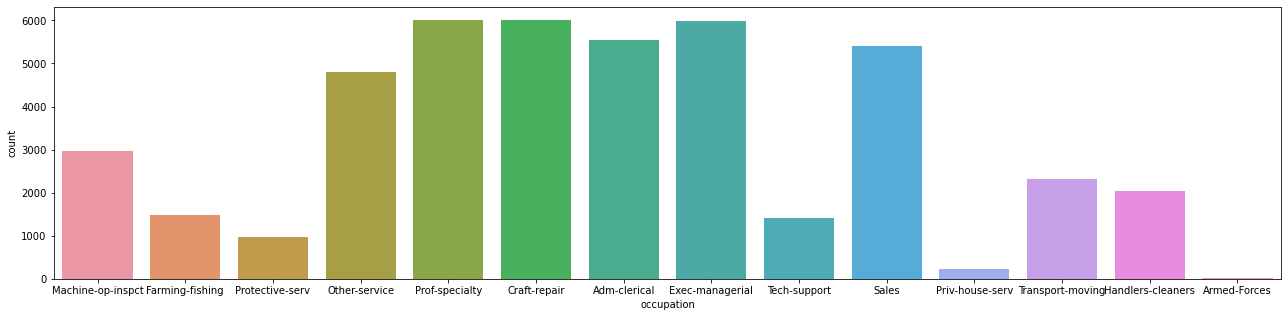

In [36]:
# occupation
plt.subplots(figsize=(22,5))
sns.countplot(df['occupation'])

- From the above statistics, most of he people are from [Craft-repair,Prof-specialty,Exec-managerial,Adm-clerical,Sales ] occupation.

<AxesSubplot:xlabel='gender', ylabel='count'>

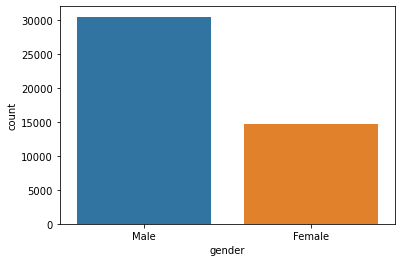

In [37]:
sns.countplot(df['gender'])

- More than 65% of total people are men.

In [38]:
# native-country
df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

- More number of people (around 91%) from US and only 1 person from Holand-Netherlands.

<AxesSubplot:xlabel='income', ylabel='count'>

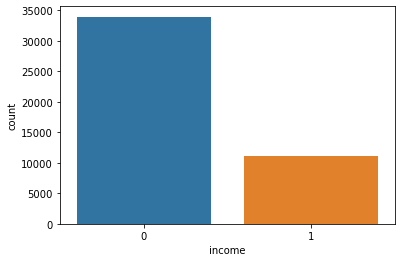

In [39]:
sns.countplot(df['income'])

In [40]:
df['income'].value_counts()[0]*100/len(df['income'])

75.20309905921417

- It shows that about 75.2% of total population earn less than 50K.

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='income', ylabel='gender'>

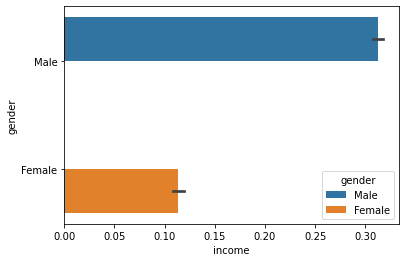

In [41]:
# income vs gender
sns.barplot(x=df['income'],y=df['gender'],hue=df['gender'])

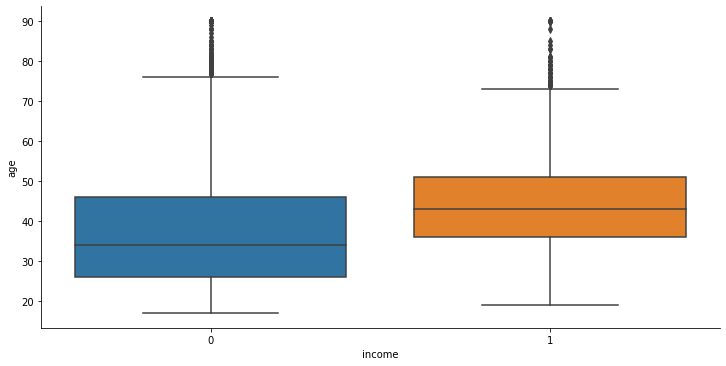

In [42]:
sns.catplot(data=df, x='income', y='age', kind= 'box', aspect=2)

- People earning more than 50K are aged between 35 and 50.
- Aged between 28-45 are earning <50K.

<AxesSubplot:xlabel='occupation', ylabel='income'>

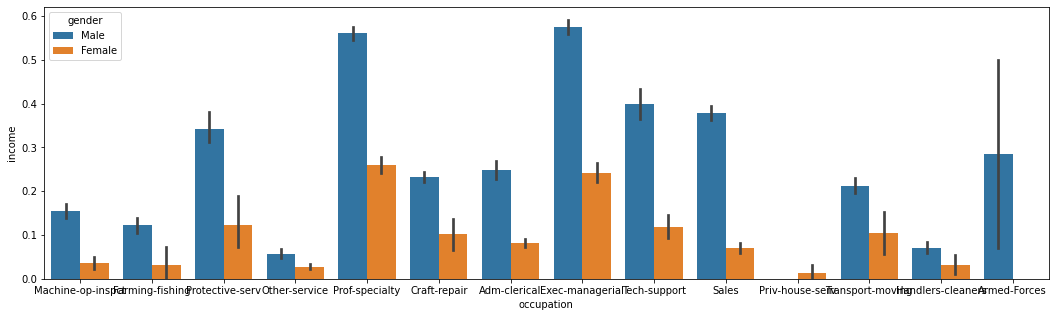

In [43]:
plt.subplots(figsize=(18,5))
sns.barplot(x='occupation', y='income', hue='gender',data=df)

In [44]:
df['occupation'].value_counts()

Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: occupation, dtype: int64

- In all the sectors men are completely dominating.
- In Armed forces, there are no women at all.
- In Priv-house-serv, there are no men.

<AxesSubplot:xlabel='gender', ylabel='Count'>

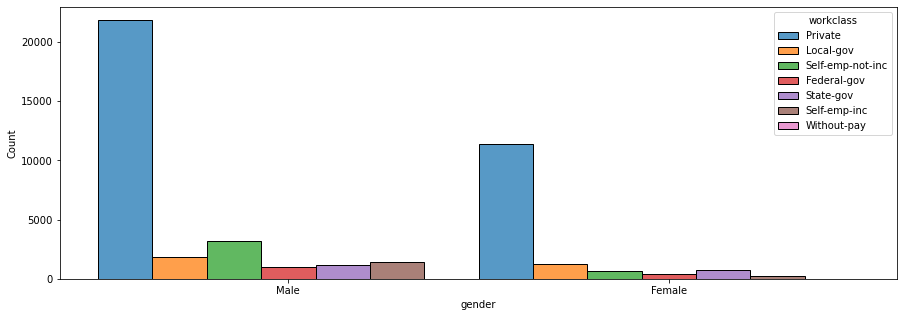

In [45]:
plt.subplots(figsize=(15,5))
sns.histplot(x='gender',hue='workclass',data=df,multiple='dodge')

<AxesSubplot:xlabel='gender', ylabel='Count'>

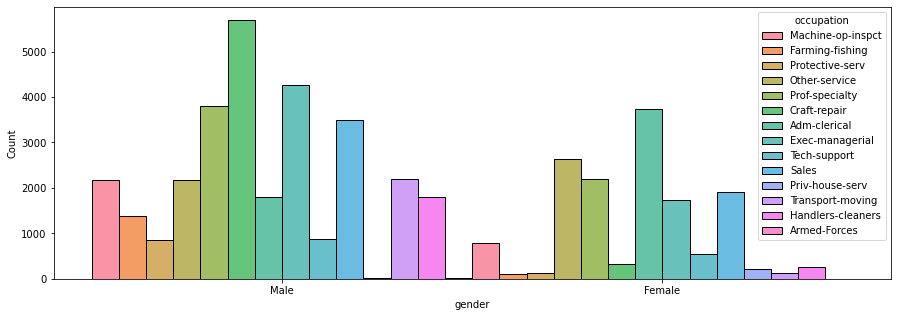

In [46]:
plt.subplots(figsize=(15,5))
sns.histplot(x='gender',hue='occupation',data=df,multiple='dodge')

<AxesSubplot:xlabel='income', ylabel='count'>

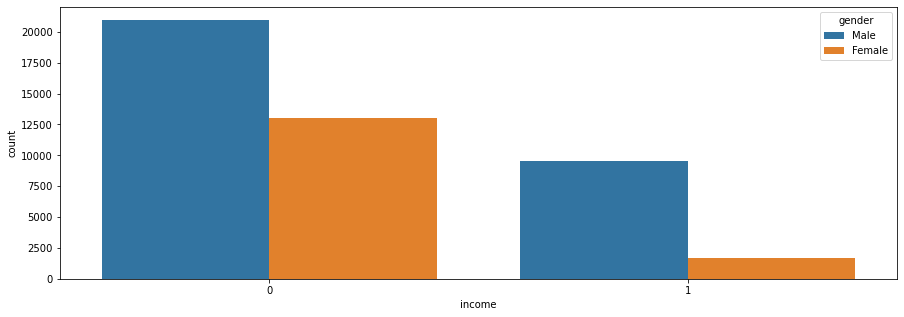

In [47]:
plt.subplots(figsize=(15,5))
sns.countplot(x='income',hue='gender',data=df)

# Seperate target and dependent variables

In [48]:
X = df.drop('income',axis=1)
y = df[['income']]

In [49]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country'],
      dtype='object')

# Outlier Detection
- As per Standard normal distribution, 99.7% of data falls in range of 3 standard deviations.
- 68% falls between one standard deviations and 95% between 2 standard deviations.
- The data outside this range os considered as outliers

In [50]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,fnlwgt,hours-per-week
count,45175.000000,4.517500e+04,45175.000000
mean,38.556170,1.897388e+05,40.942512
std,13.215349,1.056524e+05,12.007730
min,17.000000,1.349200e+04,1.000000
1%,17.000000,2.715014e+04,10.000000
5%,20.000000,3.993820e+04,20.000000
10%,22.000000,6.627800e+04,25.000000
25%,28.000000,1.173925e+05,40.000000
50%,37.000000,1.783120e+05,40.000000
75%,47.000000,2.379030e+05,45.000000


In [51]:
for i in X.select_dtypes(include='number').columns:
        Highest = X[i].mean() + 3*X[i].std()
        Lowest = X[i].mean() - 3*X[i].std()
        X[i] = np.where(X[i] > Highest,Highest,
                np.where(
                X[i] < Lowest,Lowest,
                X[i]
                ))

In [52]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,fnlwgt,hours-per-week
count,45175.000000,45175.000000,45175.000000
mean,38.535844,188429.110456,40.832054
std,13.147309,99679.796720,11.556779
min,17.000000,13492.000000,4.919322
1%,17.000000,27150.140000,10.000000
5%,20.000000,39938.200000,20.000000
10%,22.000000,66278.000000,25.000000
25%,28.000000,117392.500000,40.000000
50%,37.000000,178312.000000,40.000000
75%,47.000000,237903.000000,45.000000


In [53]:
X

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,25.0,Private,226802.0,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States
1,38.0,Private,89814.0,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States
2,28.0,Local-gov,336951.0,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States
3,44.0,Private,160323.0,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States
5,34.0,Private,198693.0,10th,Never-married,Other-service,Not-in-family,White,Male,30.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302.0,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38.0,United-States
48838,40.0,Private,154374.0,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40.0,United-States
48839,58.0,Private,151910.0,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40.0,United-States
48840,22.0,Private,201490.0,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20.0,United-States


- Encoding categorical to numeical using pd.getdummies

In [54]:
X_cat=pd.get_dummies(X.select_dtypes(include='object'),drop_first=True)

In [55]:
X_num = X.select_dtypes(include='number')
X_num

,age,fnlwgt,hours-per-week
0,25.0,226802.0,40.0
1,38.0,89814.0,50.0
2,28.0,336951.0,40.0
3,44.0,160323.0,40.0
5,34.0,198693.0,30.0
...,...,...,...
48837,27.0,257302.0,38.0
48838,40.0,154374.0,40.0
48839,58.0,151910.0,40.0
48840,22.0,201490.0,20.0


In [56]:
X_all = pd.concat([X_num,X_cat],axis=1)
X_all

,age,fnlwgt,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25.0,226802.0,40.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38.0,89814.0,50.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28.0,336951.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,44.0,160323.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,34.0,198693.0,30.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,257302.0,38.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,40.0,154374.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48839,58.0,151910.0,40.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [57]:
X_all.shape

(45175, 93)

# Split the data to train and test

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X_all,y,test_size=0.3,random_state=10)

In [59]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (31622, 93)
Shape of Testing Data (13553, 93)
Response Rate in Training Data income    0.246063
dtype: float64
Response Rate in Testing Data income    0.252416
dtype: float64


# Standardizing the numerical columns

In [60]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

- The Target is binary i.e, discete hence it's a classification problem

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [62]:
lg.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred= lg.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score

In [126]:
lg_acc = round(accuracy_score(y_test,y_pred),4)*100

In [66]:
confusion_matrix(y_test,y_pred)

array([[9309,  823],
       [1518, 1903]], dtype=int64)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10132
           1       0.70      0.56      0.62      3421

    accuracy                           0.83     13553
   macro avg       0.78      0.74      0.75     13553
weighted avg       0.82      0.83      0.82     13553



In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import ensemble
import time

In [118]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = round(accuracy_score(y_test, rf_pred), 4)*100

print(rf_acc)
print(classification_report(y_test,rf_pred))

81.77
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10132
           1       0.66      0.56      0.61      3421

    accuracy                           0.82     13553
   macro avg       0.76      0.73      0.74     13553
weighted avg       0.81      0.82      0.81     13553



In [117]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = round(accuracy_score(y_test, dt_pred), 4)*100
print(dt_acc)
print(classification_report(y_test,dt_pred))

77.10000000000001
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     10132
           1       0.55      0.54      0.55      3421

    accuracy                           0.77     13553
   macro avg       0.70      0.70      0.70     13553
weighted avg       0.77      0.77      0.77     13553



In [115]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(y_test, knn_pred), 4)*100
print(knn_acc)
print(classification_report(y_test,knn_pred))

80.67
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     10132
           1       0.63      0.57      0.60      3421

    accuracy                           0.81     13553
   macro avg       0.74      0.73      0.74     13553
weighted avg       0.80      0.81      0.80     13553



In [95]:
import xgboost
xgb = xgboost.XGBClassifier(use_label_encoder=False)
xgb.fit(X_train,y_train)

[12:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [125]:
y_pred_xgb = xgb.predict(X_test)
xgb_acc = round(accuracy_score(y_test, y_pred_xgb),4)*100
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     10132
           1       0.69      0.58      0.63      3421

    accuracy                           0.83     13553
   macro avg       0.78      0.75      0.76     13553
weighted avg       0.82      0.83      0.82     13553



In [124]:
adaboost = ensemble.AdaBoostClassifier()
adaboost.fit(X_train,y_train)
y_pred_ada = adaboost.predict(X_test)
ada_acc = round(accuracy_score(y_test, y_pred_ada),4)*100
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     10132
           1       0.70      0.56      0.62      3421

    accuracy                           0.83     13553
   macro avg       0.78      0.74      0.75     13553
weighted avg       0.82      0.83      0.82     13553



In [143]:
svm = SVC(gamma='auto',kernel='sigmoid')
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
svm_acc = round(accuracy_score(y_test, y_pred_svm),4)*100
print(classification_report(y_test,y_pred_svm))
print(svm_acc)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     10132
           1       0.61      0.52      0.56      3421

    accuracy                           0.79     13553
   macro avg       0.73      0.70      0.71     13553
weighted avg       0.79      0.79      0.79     13553

79.44


In [144]:
svm_poly = SVC(gamma='auto',kernel='poly')
svm_poly.fit(X_train,y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
svm_poly_acc = round(accuracy_score(y_test, y_pred_svm_poly),4)*100
print(classification_report(y_test,y_pred_svm_poly))
print(svm_acc)

              precision    recall  f1-score   support

           0       0.84      0.94      0.88     10132
           1       0.72      0.45      0.56      3421

    accuracy                           0.82     13553
   macro avg       0.78      0.70      0.72     13553
weighted avg       0.81      0.82      0.80     13553

79.44


In [142]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','KNeighborsClassifier'
              ,'svm','XGBClassifier','AdaBoostClassifier'],
    'Score': [lg_acc,dt_acc,rf_acc,knn_acc,svm_acc,xgb_acc,ada_acc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df

,Model,Score
0,Logistic Regression,82.76
5,XGBClassifier,82.76
6,AdaBoostClassifier,82.70
4,svm,82.49
2,Random Forest Classifier,81.77
3,KNeighborsClassifier,80.67
1,Decision Tree Classifier,77.10


### Gridsearch for logistic regression

In [135]:
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

logreg_cv = GridSearchCV(lg, param_grid, cv = 5)
 
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [138]:
logreg_cv.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'lbfgs'}

In [137]:
y_pred_logreg_cv = logreg_cv.predict(X_test)
logreg_cv_acc = round(accuracy_score(y_test,y_pred_logreg_cv),4)*100
logreg_cv_acc

82.73

- As we can see logistic regression and boosting algorithms are performing bit better than other.
- After hypermeter tuning for logistic regression also accuracy haven't increased.
- Hence we can go for Logistic Regression model.

# Chi-Square Test to check the relation between Occupation and Gender.

### Is there a relationship between occupation and gender? (i.e. does the preference of occupation depend on the gender)

In [128]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst

In [133]:
sample_columns = pd.crosstab(df['gender'],df['occupation'],margins=True)
pv = cst(sample_columns)[1]
if pv < 0.05:
    print('We reject the null hypothesis and Gender impacts Occupation')
else:
    print('We fail to reject null hypothesis and Gender does not impact Occupation')

We reject the null hypothesis and Gender impacts Occupation


<AxesSubplot:xlabel='gender', ylabel='Count'>

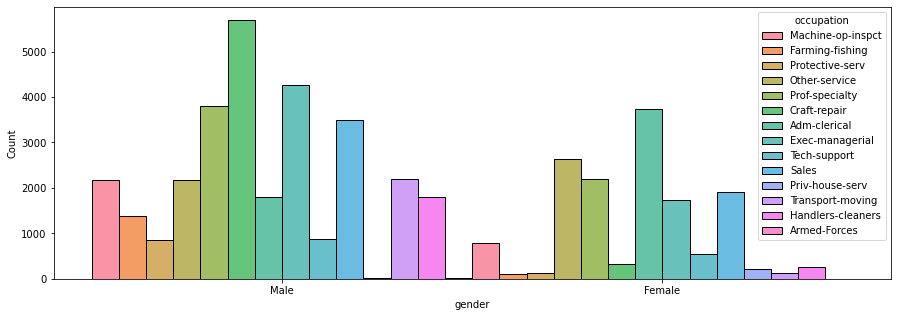

In [132]:
plt.subplots(figsize=(15,5))
sns.histplot(x='gender',hue='occupation',data=df,multiple='dodge')

- From the above claims (both chi-square test and visualization) it's evident that in almost all the occupations in the dataset, Male are dominating.
- Hence, Gender impacts Occupation.

# Chi-Square Test to check the relation between Income and Gender.

### Is there a relationship between gender and income

In [134]:
sample_columns = pd.crosstab(df['gender'],df['income'],margins=True)
pv = cst(sample_columns)[1]
if pv < 0.05:
    print('We reject the null hypothesis and Gender impacts income')
else:
    print('We fail to reject null hypothesis and Gender does not impact income')

We reject the null hypothesis and Gender impacts income


<AxesSubplot:xlabel='occupation', ylabel='income'>

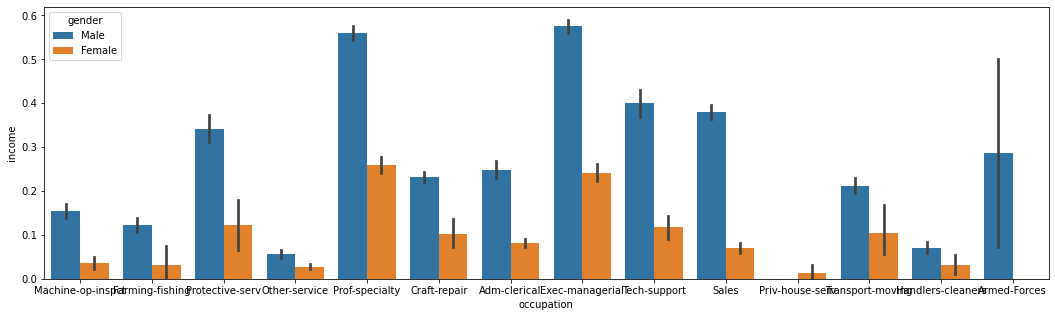

In [131]:
plt.subplots(figsize=(18,5))
sns.barplot(x='occupation', y='income', hue='gender',data=df)

- From the above 2 tests, we can clearly say that gender effects income.